In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/justs/Documents/Datasets/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


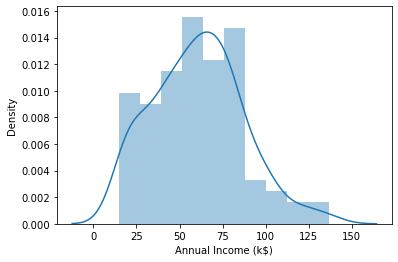

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

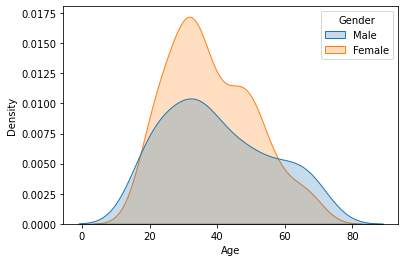

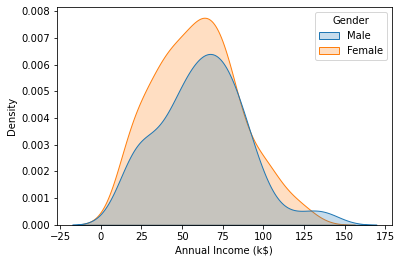

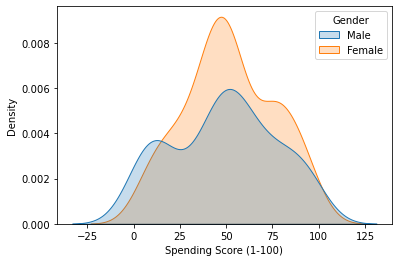

In [14]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

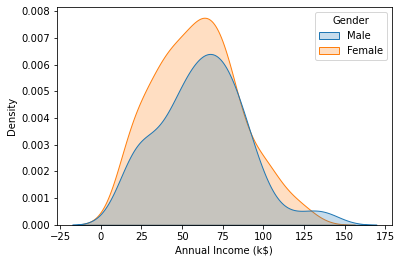

In [11]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

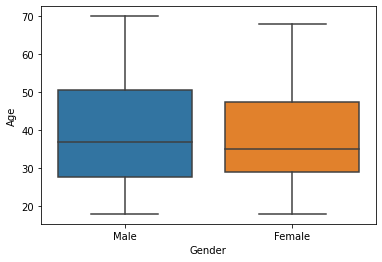

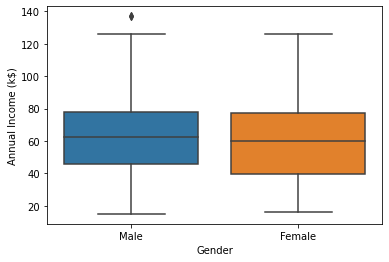

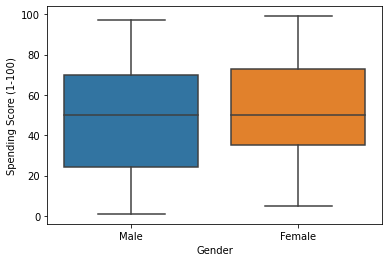

In [15]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [17]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

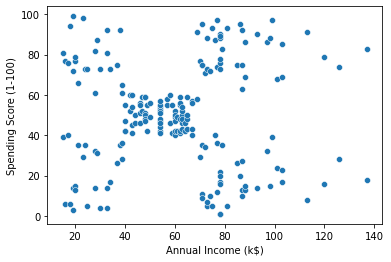

In [19]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')

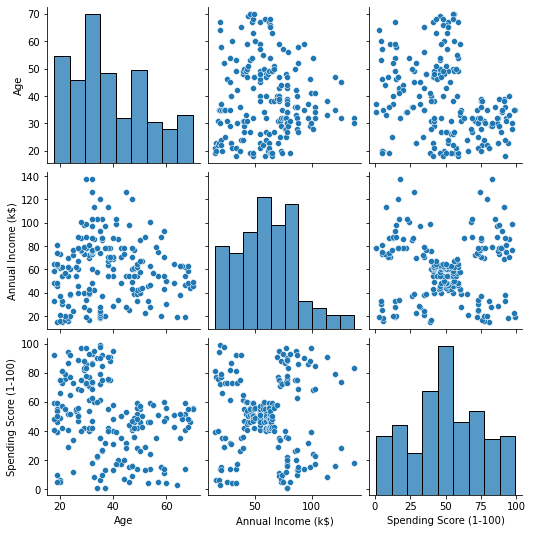

In [21]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df)

In [22]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [23]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

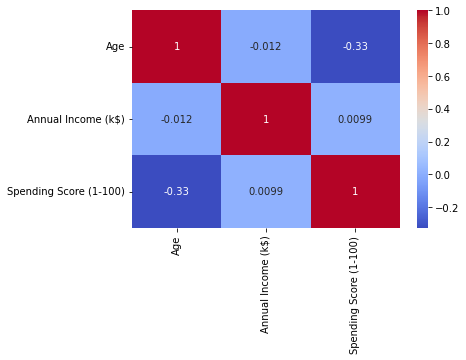

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [40]:
clustering1 = KMeans(n_clusters=3)

In [41]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [42]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [43]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [44]:
df['Income Cluster'].value_counts()

0    92
2    72
1    36
Name: Income Cluster, dtype: int64

In [45]:
clustering1.inertia_

23528.15217391304

In [46]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [47]:
intertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3941.4163614163617,
 2857.4416971916976,
 2217.6406204906207,
 1746.4707792207791]

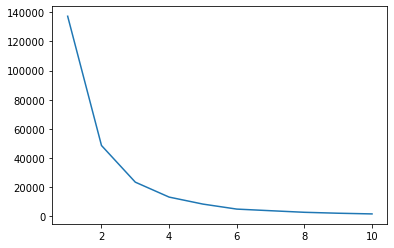

In [48]:
plt.plot(range(1,11),intertia_scores)  #elbow method

In [49]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [50]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


In [51]:
#Bivariate Clustering 

In [54]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,1
2,Female,20,16,6,2,4
3,Female,23,16,77,2,1
4,Female,31,17,40,2,4


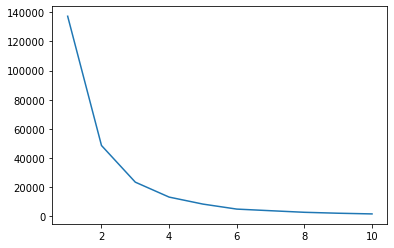

In [55]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores)

In [60]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

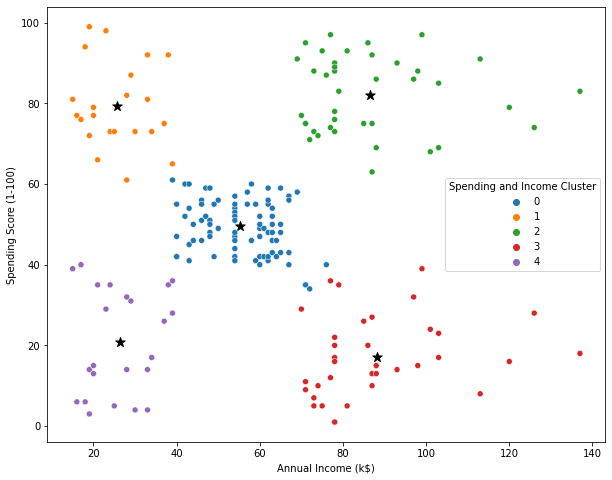

In [79]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y ='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [62]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [63]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [64]:
#multivarient clustering
from sklearn.preprocessing import StandardScaler

In [65]:
scale = StandardScaler()

In [66]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,1
2,Female,20,16,6,2,4
3,Female,23,16,77,2,1
4,Female,31,17,40,2,4


In [68]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,4,1
1,21,15,81,2,1,1
2,20,16,6,2,4,0
3,23,16,77,2,1,0
4,31,17,40,2,4,0


In [69]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [70]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [71]:
dff = scale.fit_transform(dff)

In [72]:
dff

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [74]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


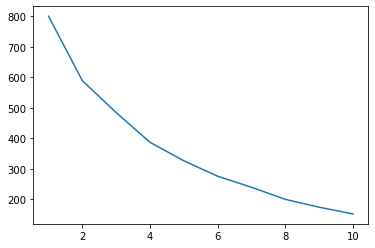

In [76]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [77]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,1
2,Female,20,16,6,2,4
3,Female,23,16,77,2,1
4,Female,31,17,40,2,4
...,...,...,...,...,...,...
195,Female,35,120,79,1,2
196,Female,45,126,28,1,3
197,Male,32,126,74,1,2
198,Male,32,137,18,1,3


In [78]:
df.to_csv('Clustering.csv')